<a href="https://cognitiveclass.ai/">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/SNLogo.png" width="200" align="center">
</a>


<h1>Lab - Classifying Images using IBM Watson Visual Recognition in Python</h1>

<h1>Introduction</h1>

## Objectives

After completing this lab you will be able to:

-   How to operate the Watson Visual Recognition API and OpenCV using the Python Programming Language
-   Understand the advantage of using the Watson Visual Recognition API over the Graphic User Interface on the Browser
-   How to automate the training, and testing of your Visual Recognition model.

So instead of logging in to your IBM Cloud account so that you can upload a picture that you want to classify, you can upload an image to your Visual Recognition model by running piece of python code. 


<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Click on the links to go to the following sections:</strong></font>
<br>
<h2>Table of Contents</h2>
<ol>
    <li><a href="#ref1">IBM Watson Package</a></li>
    <li><a href="#ref2">Plotting images in Jupyter Notebooks</a></li>
    <li><a href="#ref3">Classify images with IBM Watson API</a></li>
    <li><a href="#ref5">Exercises</a></li>
</ol>    
</div>


<a id="ref1"></a>

<h2>IBM Watson Package</h2>
In order to run this lab we need to import two packages.
<ul>
    <li>IBM Watson: which allows access to the Watson Visual Recognition API</li>
    <li>OpenCV: a package that will help us with image processing</li>
</ul>
The code below will install Watson Developer Cloud and OpenCV. 

To run, click on the code cell below and press "shift + enter".

<b>NOTE - The Watson Developer Cloud Package has been deprecated and has been replaced by the IBM Watson Package </b>


In [1]:
! pip install --upgrade ibm-watson

     |████████████████████████████████| 389kB 7.2MB/s eta 0:00:01
     |████████████████████████████████| 204kB 34.1MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/6e/14/69/dbbd573a3bab3bf64984572284f13f174f430038308abdd73c
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/34/6e/58/589e0f841c2fae9dad99630d78ddc7a60c5c7663a16a39cdbb
Successfully built ibm-watson ibm-cloud-sdk-core


<h4>What (or who) do you see in the following image?</h4>


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg" width="400"></img>  
<b>URL</b>:  
<i>[https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)</i>


<a id="ref2"></a>

<h2>Plotting images in Jupyter Notebooks</h2>


Let's use a function to help us display images from a URL: The function below with the name <code>plt_image</code> grabs the image from the internet provided that you supply the web address of the image.<br>

URL stands for Uniform Resource Locator, which in this case the web address of our image.


In [2]:
import cv2
import urllib.request
from matplotlib import pyplot as plt
from pylab import rcParams

def plt_image(image_url, size = (10,8)):

    # Downloads an image from a URL, and displays it in the notebook
    urllib.request.urlretrieve(image_url, "image.jpg") # downloads file as "image.jpg"
    image = cv2.imread("image.jpg")
    
    # If image is in color, then correct color coding from BGR to RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    rcParams['figure.figsize'] = size[0], size[1] #set image display size

    plt.axis("off")
    plt.imshow(image, cmap="Greys_r")
    plt.show()

Let's grab the image above from the internet and plot it out.


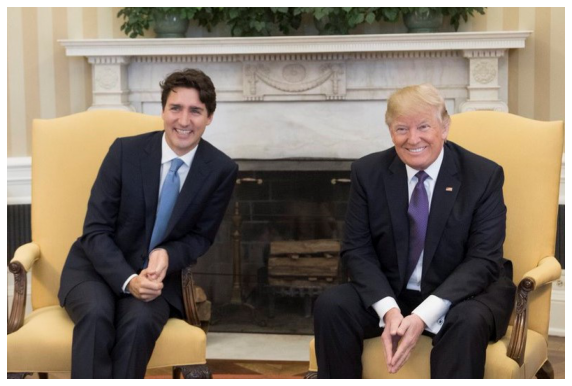

In [3]:
image_url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg'
plt_image(image_url)

<a id="ref3"></a>

<h2>Classify images with IBM Watson API</h2>


<h4>Setting the API key for IBM Watson Visual Recognition</h4>

<p>In order for you to use the IBM Watson Visual Recognition API, you will need the API key of the Visual Recognition instance that you have created in the previous sections.</p>

<p>Log into your IBM Cloud account with the following link.</p> <a href="https://cocl.us/CV0101EN_IBM_Cloud_Login">https://cloud.ibm.com</a>
<ol>
    <li>Click on <b>Services</b></li>
    <li>Under Services, click on your Watson Visual Recognition Instance</li>
    <li>Copy the <b>API Key</b> and past it in the code cell below</li>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/API_Key.png" width="680">
    <li>Then press "ctrl + enter" to run the code cell.</li>
</ol>


In [7]:
# Paste your API key for IBM Watson Visual Recognition below:
my_apikey = '32njUe7Nh7DC4DpUkVMQv0XGWOPetg2Xgn4pRqZl3uXr'

<h4>Initialize Watson Visual Recognition</h4>
Let's create your own Watson Visual Recognition instance, it will allow you to make calls to the Watson Visual Recognition API.


In [8]:
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
authenticator = IAMAuthenticator(my_apikey)

visrec = VisualRecognitionV3('2018-03-19', 
                             authenticator=authenticator)

#### Identifying Objects in the Image


<p>We can see that there are two persons in the picture above. But does the computer knows this?</p>

<p>Let's call the <b>classify</b> method from the Watson Image Recognition API to see what objects our Image Recognition Model can identify from this picture.</p>


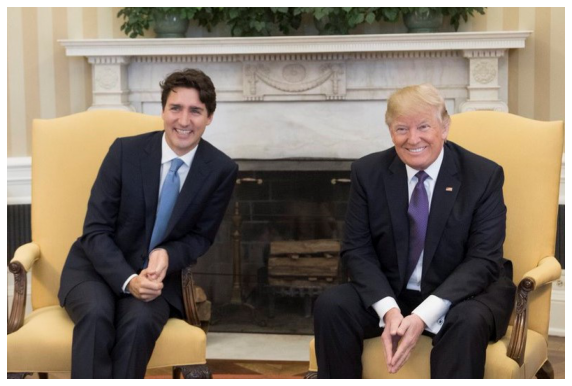

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "beige color",
              "score": 0.782
            }
          ]
        }
      ],
      "source_url": "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg",
      "resolved_url": "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 0
}


In [9]:
import json

image_url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg'


# threshold is set to 0.6, that means only classes that has a confidence score of 0.6 or greater will be shown
classes = visrec.classify(url=image_url,
                          threshold='0.6',
                          classifier_ids='default').get_result()

plt_image(image_url)
print(json.dumps(classes, indent=2))

Under the field classes, you should see the class person, and other classes with their corresponding confidence score. You might get other classes other than person depending on your Visual Recognition model.


<h4>Getting Watson Visual Recognition results as a dataframe</h4>


<p>The problem with the <b>classify</b> method is that it gave an output that is extremely confusing to look at. The output is in a format called JSON which stands for JavaScript Object Notation, we can cleanup the presentation of our output by using the data structure called dataframe in the <b>pandas</b> library.</p>

<p>In the code cell below we use a function called <b>getdf_visrec</b> which uses a dataframe that can help us easily sort the classified labels by confidence score in descending order.</p>


In [10]:
from pandas.io.json import json_normalize

def getdf_visrec(url, apikey = my_apikey):
    
    json_result = visrec.classify(url=url,
                              threshold='0.6',
                              classifier_ids='default').get_result()
    
    json_classes = json_result['images'][0]['classifiers'][0]['classes']
    
    df = json_normalize(json_classes).sort_values('score', ascending=False).reset_index(drop=True)
    
    return df

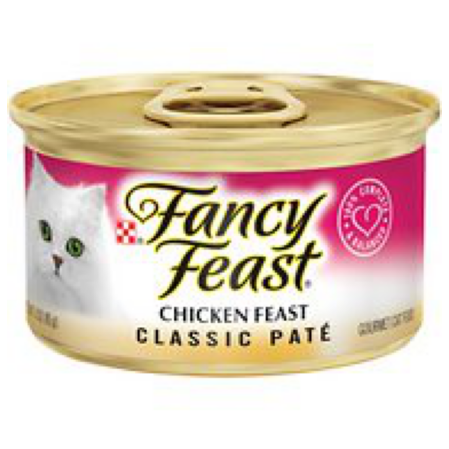

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


,class,score,type_hierarchy
0,food,0.843,NaN
1,toiletry,0.772,NaN
2,cat food,0.710,/food/feed/cat food
3,feed,0.710,NaN
4,pale yellow color,0.697,NaN
5,beige color,0.679,NaN


In [11]:
url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/76011_MAIN._AC_SS190_V1446845310_.jpg'
plt_image(url)
getdf_visrec(url)

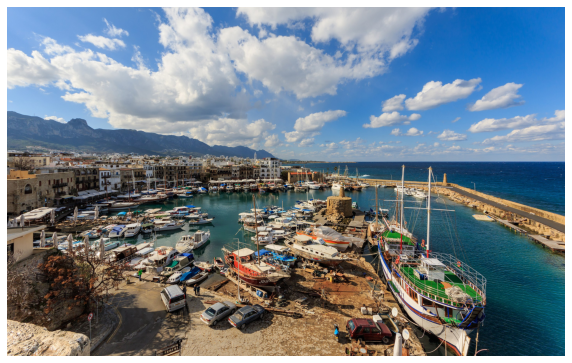

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


,class,score,type_hierarchy
0,nature,0.895,NaN
1,sea green color,0.864,NaN
2,blue color,0.858,NaN
3,shore,0.833,NaN
4,natural elevation,0.794,NaN
5,seashore,0.790,/nature/shore/seashore
6,slope,0.782,NaN


In [12]:
url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/2880px-Kyrenia_01-2017_img04_view_from_castle_bastion.jpg'
plt_image(url)
getdf_visrec(url)

<a id="ref5"></a>

<h2>Exercises</h2>
<h3>Question 1</h3>
<p>Write a function called plot_image that takes an url of jpg format image, fixes the color scheme of the image, and sets the dimension of the image to 12, 9 and plots it.</p>


In [16]:
# Write your code below and press Shift+Enter to execute

import urllib.request
from matplotlib import pyplot as plt
from pylab import rcParams

def analyze_image(image_url, size = (12,9)):

    # Downloads an image from a URL, and displays it in the notebook
    urllib.request.urlretrieve(image_url, "image.jpg") # downloads file as "image.jpg"
    image = cv2.imread("image.jpg")
    
    # If image is in color, then correct color coding from BGR to RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    rcParams['figure.figsize'] = size[0], size[1] #set image display size

    plt.axis("off")
    plt.imshow(image, cmap="Greys_r")
    plt.show()

Double-click <font color="red"><b><u>here</b></u></font> for the solution.

<!-- The answer is below:
url = 'Paste_your_Image_link_here' 

import urllib.request
from matplotlib import pyplot as plt
from pylab import rcParams

def plot_image(image_url, size=(12, 9)):
    # Downloads an image from a URL, and displays it in the notebook
    urllib.request.urlretrieve(image_url, "exercise_image.jpg") # downloads file as "exercise_image.jpg"
    exercise_image = cv2.imread("exercise_image.jpg")

    # If image is in color, then correct color coding from BGR to RGB
    if len(exercise_image.shape) == 3:
        exercise_image = cv2.cvtColor(exercise_image, cv2.COLOR_BGR2RGB)
    
    # set image to correct size
    rcParams['figure.figsize'] = size[0], size[1]
    plt.axis("off")
    plt.imshow(exercise_image, cmap="Greys_r")
    plt.show()

plot_image(url)
--->


<h3>Question 2</h3>
<p>Write a function called analyze_image that takes in a url of a jpg format image, and identifies <b>ALL</b> objects in the image. Further, it uses a pandas dataframe to convert the result into a table format</p>


In [17]:

# Write your code below and press Shift+Enter to execute 
from pandas.io.json import json_normalize    
    
def analyze_image(url, apikey = my_apikey):
    
    json_result = visrec.classify(url=url,
                              threshold='0.0',
                              classifier_ids='default').get_result()
    
    json_classes = json_result['images'][0]['classifiers'][0]['classes']
    
    df = json_normalize(json_classes).sort_values('score', ascending=False).reset_index(drop=True)
    
    return df

plt()

Double-click <font color="red"><b><u>here</b></u></font> for the solution.

<!-- The answer is below:
url = 'Paste_your_image_url_here'
from pandas.io.json import json_normalize

def analyze_image(url):
    
    # The threshold value specifies the minimum score an object class must have to be displayed in the
    # in the result. Setting this value to 0.0 returns ALL object classes (i.e. all objects) in the image
    # as identified by our Visual Recognition Model

    json_result = visrec.classify(url=url,
                              threshold='0.0',
                              classifier_ids='default').get_result()
    
    json_classes = json_result['images'][0]['classifiers'][0]['classes']
    
    df = json_normalize(json_classes).reset_index(drop=True).reset_index(drop=True)
    return df
plt_image(url)
analyze_image(url)
-->


<h1>Thank you for completing this notebook</h1>
You can read more about Watson Visual Recognition APIs from the following link.
<a href="https://cloud.ibm.com/apidocs/visual-recognition?code=python">https://cloud.ibm.com/apidocs/visual-recognition</a>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<h2>Get IBM Watson Studio free of charge!</h2>
    <p><a href="https://cloud.ibm.com/catalog/services/watson-studio"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/BottomAd.png" width="750" align="center"></a></p>
</div>


## Author

<a href="https://www.linkedin.com/in/nayefaboutayoun/" target="_blank">Nayef Abou Tayoun</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Shubham    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
